In [1]:
import pandas as pd
import numpy as np
import sys,os
sys.path.append(os.path.expanduser("~")+"/ivpy/src")
from ivpy import *
from ivpy.extract import norm
import warnings
warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.expanduser("~")+"/collproc")
from coll import *

## Bounds dict

In [3]:
b = {}

In [4]:
crit = 0.95

# Intra-pocket variance

#### roughness

In [5]:
rf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/texture/genome_roughness_768_250_501_21_divide.csv")

In [6]:
rf['catalog'] = [os.path.basename(item)[:-4].split("_")[0] for item in rf.localpath]

In [7]:
def rng(col, return_bounds=False):
    
    colmin = min(col)
    colmax = max(col)
    
    if return_bounds:
        return colmax-colmin, colmin, colmax
    
    return colmax - colmin

In [8]:
roughness_ranges = rf.groupby('catalog').agg(rng).reset_index().roughness

<AxesSubplot:>

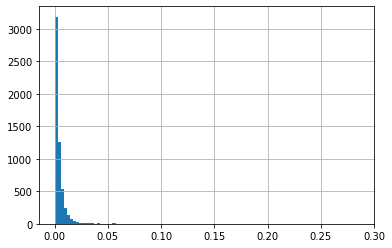

In [9]:
roughness_ranges.hist(bins=100)

In [10]:
np.std(roughness_ranges) * 4

0.038041211674728875

In [11]:
t = 0.1
incr = 0.0001
while True:
    t -= incr
    p = np.mean(roughness_ranges < t)
    if p < crit:
        print(t)
        break

0.013199999999998147


In [12]:
b['roughness'] = {
    "lower": round(rf.roughness.min(),4),
    "upper": round(rf.roughness.max(),4),
    "d": round(t,4)
}

In [13]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0132}}

#### dmin

In [14]:
cf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/color/_OLD/colors.csv")

In [15]:
cf = cf[['cat','mloc','LAB_B','LAB_L']][cf.mloc!='dmax']

In [16]:
attach(cf,'cat')

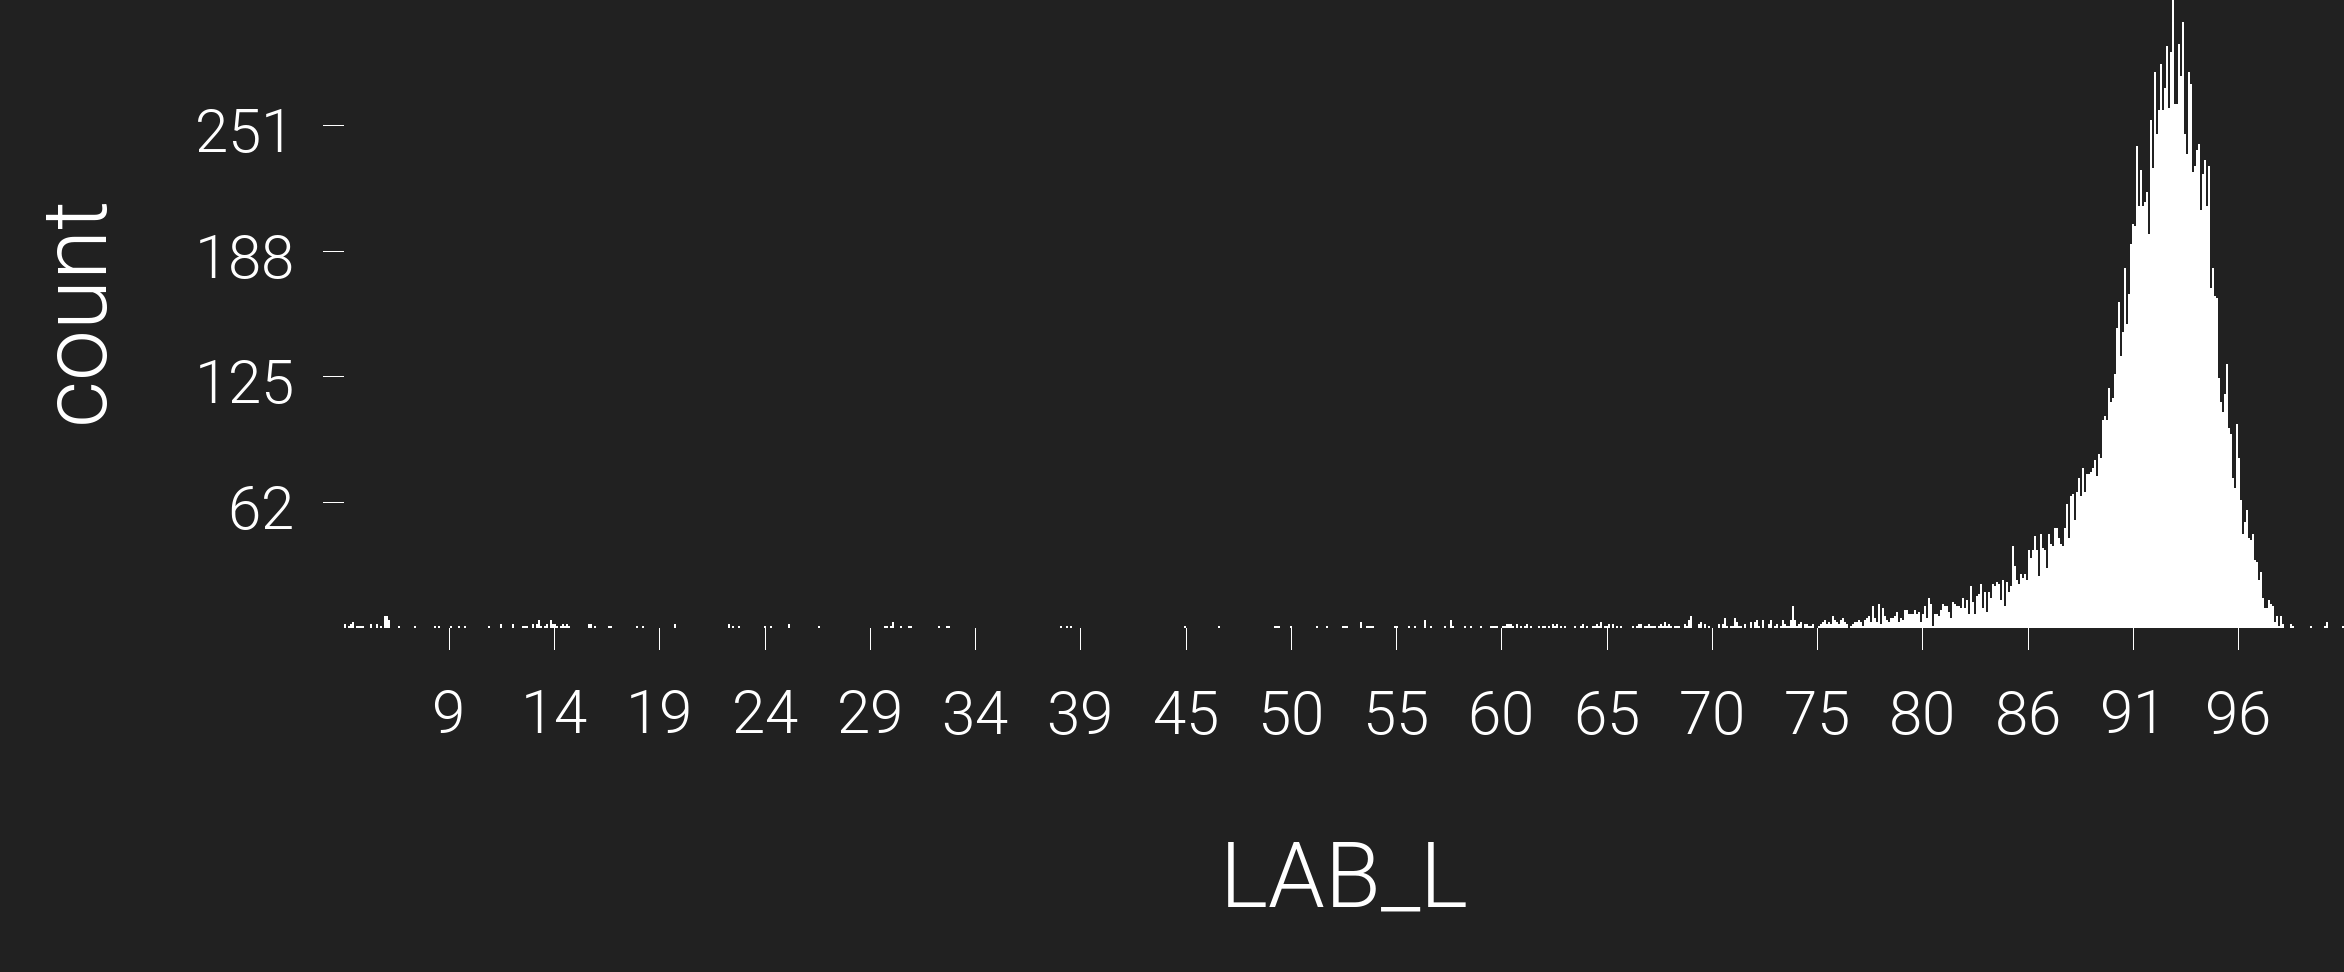

In [17]:
histogram(xcol='LAB_L',dot=True,thumb=2,bins=1000,xaxis=20)

In [18]:
cf = cf[cf.LAB_L>=75]

In [19]:
cf.LAB_B.max()

32.4

In [20]:
np.std(cf[['cat','LAB_B']].groupby('cat').agg(rng).reset_index().LAB_B) * 4

2.4784761201487018

In [21]:
color_ranges = cf[['cat','LAB_B']].groupby('cat').agg(rng).reset_index().LAB_B

In [22]:
t = 7
incr = 0.0001
while True:
    t -= incr
    p = np.mean(color_ranges < t)
    if p < crit:
        print(t)
        break

1.709900000002803


In [23]:
b['bstar_base'] = {
    "lower": round(cf.LAB_B.min(),4),
    "upper": round(cf.LAB_B.max(),4),
    "d": round(t,4)
}

In [24]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0132},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 1.7099}}

#### dmax

In [25]:
cf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/color/_OLD/colors.csv")

In [26]:
cf = cf[['cat','mloc','LAB_B','LAB_L']][cf.mloc=='dmax']

In [27]:
attach(cf,'cat')

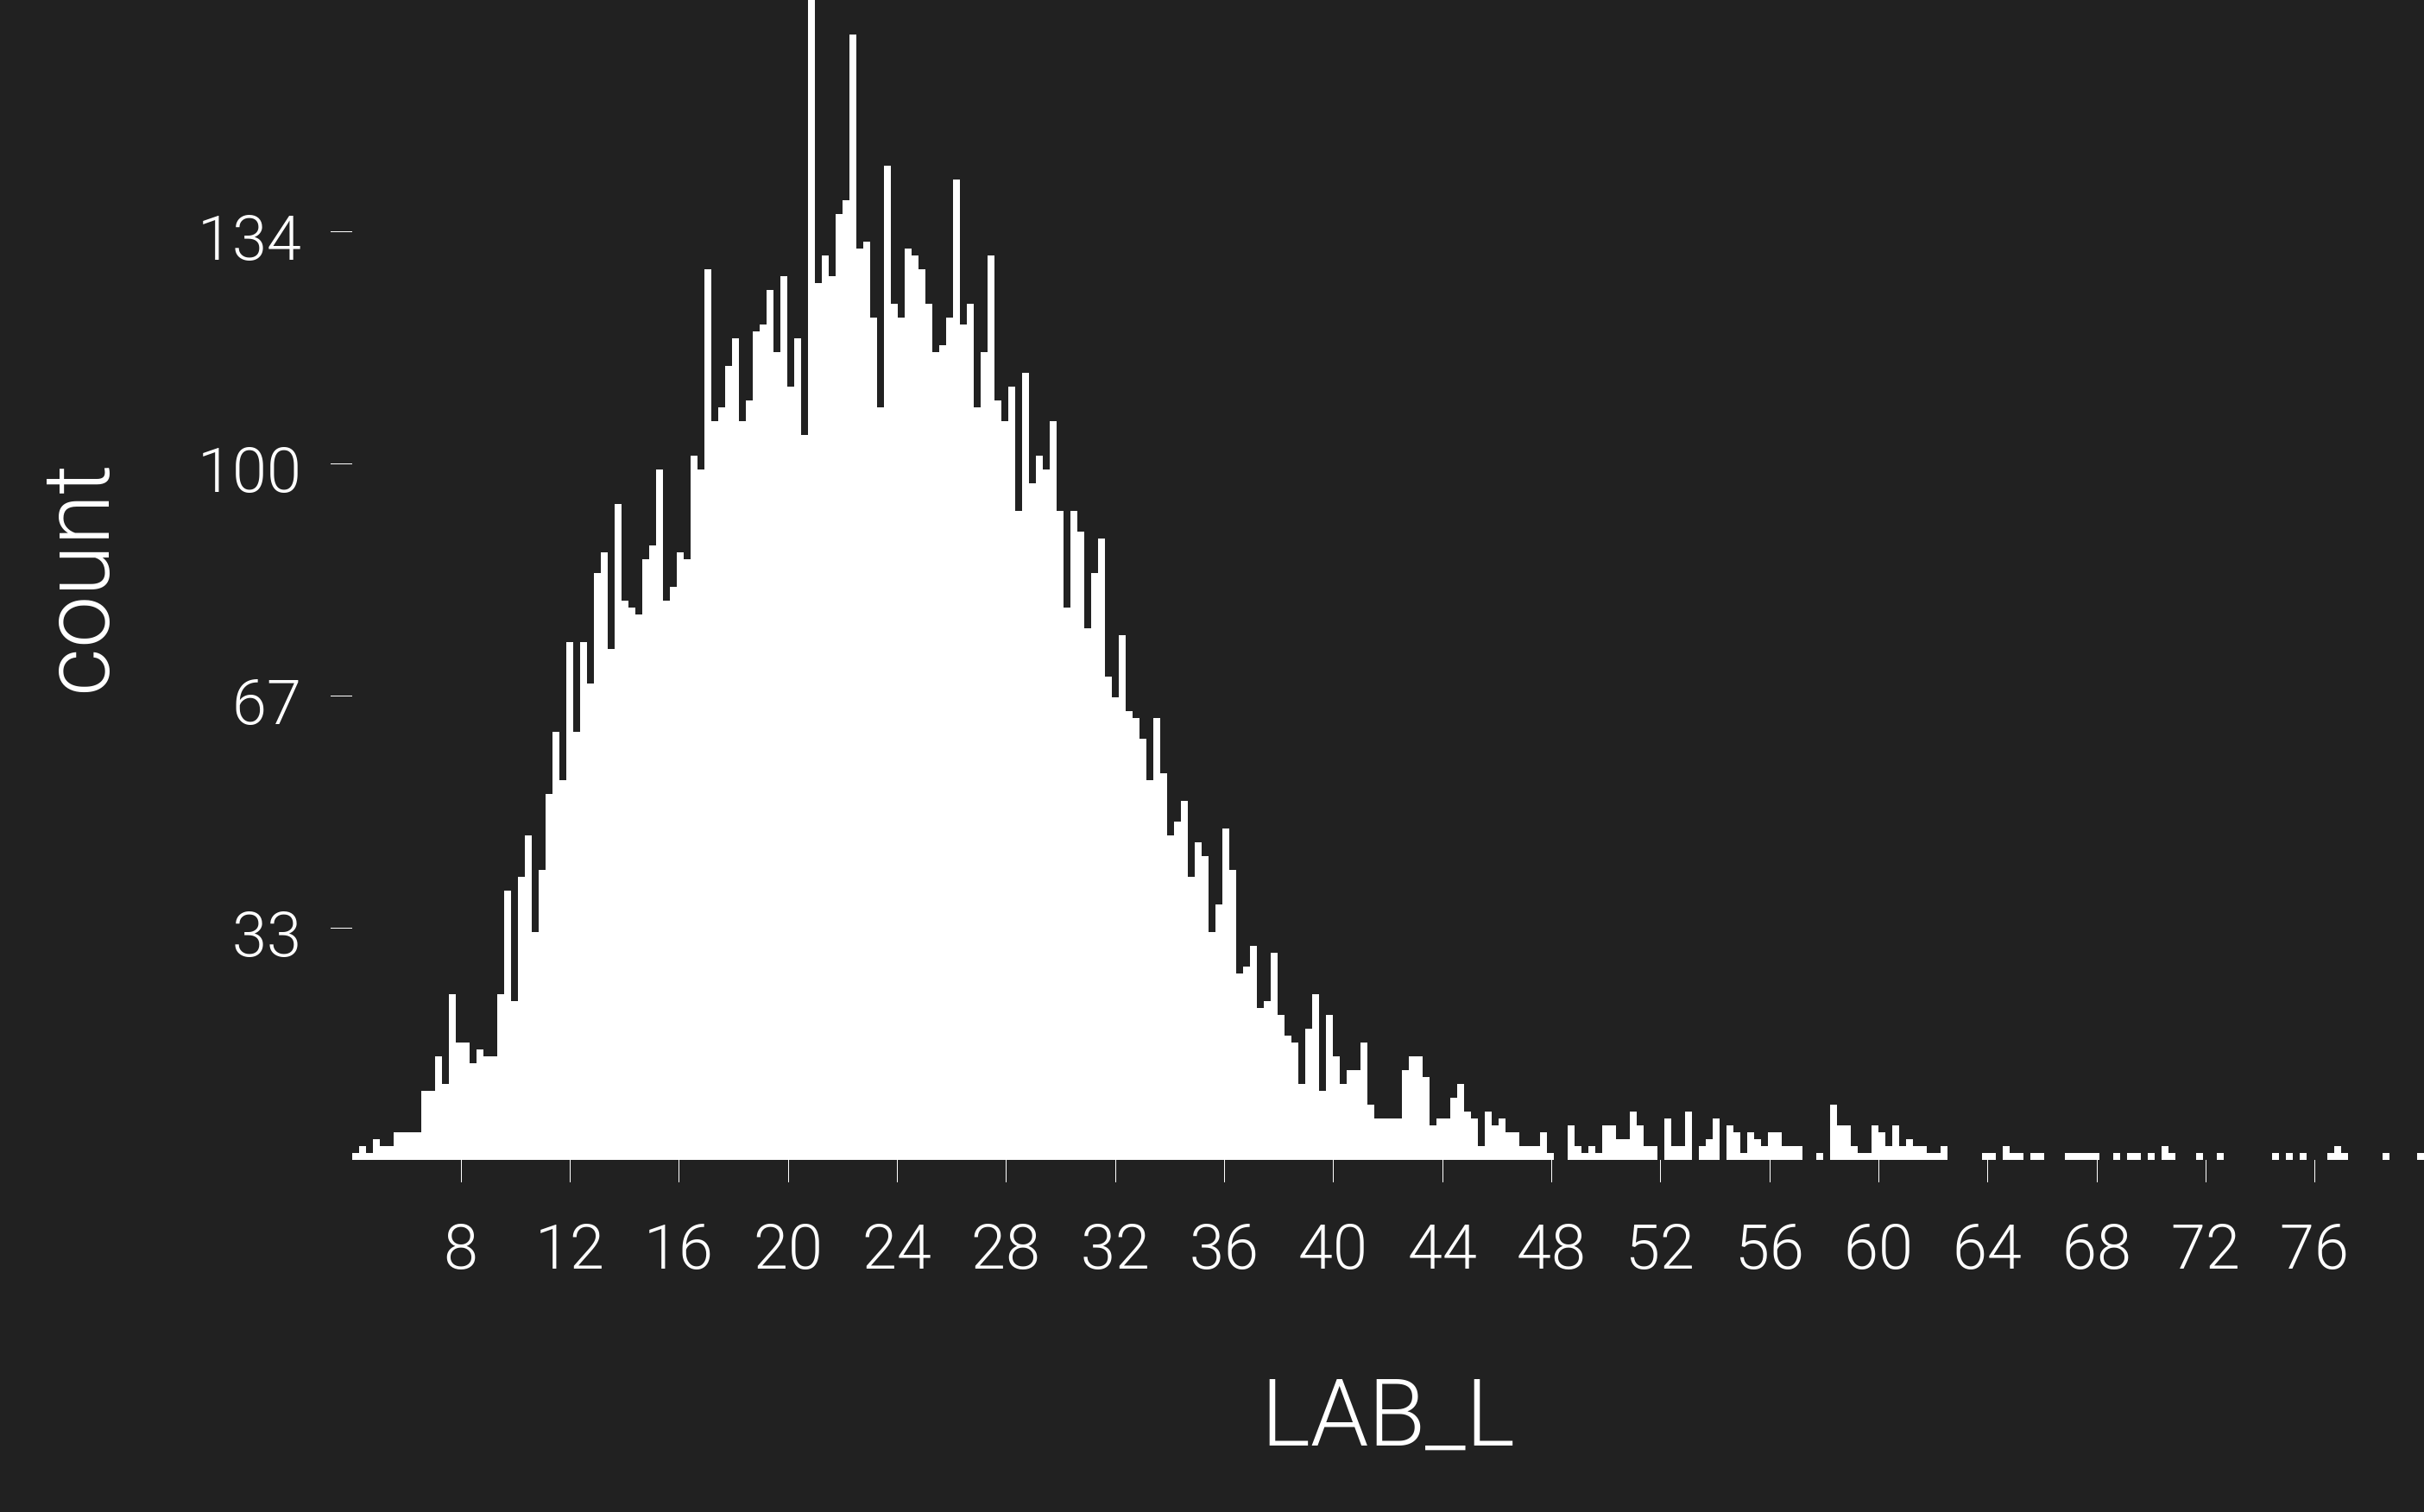

In [28]:
histogram(xcol='LAB_L',dot=True,thumb=8,bins=300,xaxis=20)

In [29]:
cf = cf[cf.LAB_L<=48]

<AxesSubplot:>

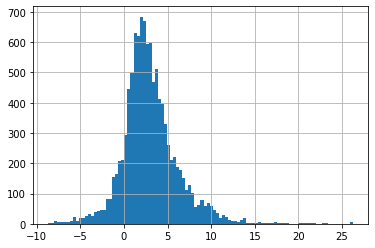

In [30]:
cf.LAB_B.hist(bins=100)

In [31]:
np.std(cf[['cat','LAB_B']].groupby('cat').agg(rng).reset_index().LAB_B) * 4

3.464475672659658

In [32]:
color_ranges = cf[['cat','LAB_B']].groupby('cat').agg(rng).reset_index().LAB_B

<AxesSubplot:>

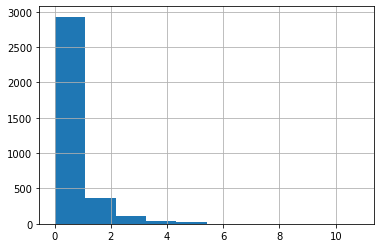

In [33]:
color_ranges.hist()

In [34]:
t = 10
incr = 0.0001
while True:
    t -= incr
    p = np.mean(color_ranges < t)
    if p < crit:
        print(t)
        break

2.2699000000103324


In [35]:
b['bstar_image'] = {
    "lower": round(cf.LAB_B.min(),4),
    "upper": round(cf.LAB_B.max(),4),
    "d": round(t,4)
}

In [36]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0132},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 1.7099},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 2.2699}}

#### gloss

In [37]:
gf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/gloss/_OLD/gloss_disagg.csv")

In [38]:
gf = gf[gf.g60 < 114]

In [39]:
np.std(gf[['catalog','g60']].groupby('catalog').agg(rng).reset_index().g60) * 4

17.536477125952725

In [40]:
gloss_ranges = gf[['catalog','g60']].groupby('catalog').agg(rng).reset_index().g60

<AxesSubplot:>

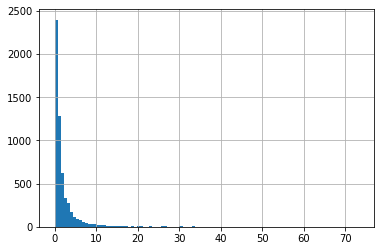

In [41]:
gloss_ranges.hist(bins=100)

In [42]:
t = 50
incr = 0.0001
while True:
    t -= incr
    p = np.mean(gloss_ranges < t)
    if p < crit:
        print(t)
        break

8.661699999456857


In [43]:
b['gloss'] = {
    "lower": round(gf.g60.min(),4),
    "upper": round(gf.g60.max(),4),
    "d": round(t,4)
}

In [44]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0132},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 1.7099},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 2.2699},
 'gloss': {'lower': 0.1588, 'upper': 113.9904, 'd': 8.6617}}

#### thickness

In [45]:
tf = pd.read_csv("/Users/damoncrockett/lmlproc/proc/thickness/_OLD/thickness_disagg.csv")

In [46]:
from ast import literal_eval

In [47]:
tf.measurements = tf.measurements.apply(literal_eval)

In [48]:
tf.measurements = tf.measurements.apply(lambda x: [abs(item) for item in x if abs(item) < 1])

In [49]:
allt = [item for sublist in tf.measurements for item in sublist]

In [50]:
max(allt)

0.72

In [51]:
tf['tlen'] = tf.measurements.apply(len)

In [52]:
tf = tf[tf.tlen > 0]

In [53]:
tmin = min(allt)

In [54]:
tmax = max(allt)

In [55]:
trange = tmax - tmin

In [56]:
tf['mrange'] = tf.measurements.apply(rng)

In [57]:
np.std(tf.mrange) * 4

0.06684812163689198

<AxesSubplot:>

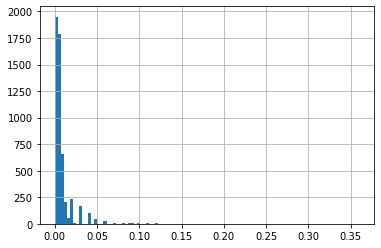

In [58]:
tf.mrange.hist(bins=100)

In [59]:
t = 0.2
incr = 0.0001
while True:
    t -= incr
    p = np.mean(tf.mrange < t)
    if p < crit:
        print(t)
        break

0.029900000000005596


In [60]:
b['thickness'] = {
    "lower": round(tmin,4),
    "upper": round(tmax,4),
    "d": round(t,4)
}

In [61]:
pkl(b,'d.pkl')

In [62]:
b

{'roughness': {'lower': 0.0048, 'upper': 0.4897, 'd': 0.0132},
 'bstar_base': {'lower': -7.28, 'upper': 32.4, 'd': 1.7099},
 'bstar_image': {'lower': -8.6815, 'upper': 26.23, 'd': 2.2699},
 'gloss': {'lower': 0.1588, 'upper': 113.9904, 'd': 8.6617},
 'thickness': {'lower': 0.04, 'upper': 0.72, 'd': 0.0299}}